In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-06-02'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just do the atropine

In [4]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4
mu_c_mat=[0,7.5,0,7.5]
sigma_c_mat=[0,2,2,0]

deficit_blur=4  # I hardcoded this number in the atropine function

blur_mat=linspace(0,12,13)
blur_mat=blur_mat.astype(int)
blur_mat



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
open_eye_noise=0.1


for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        all_params.append(params(count=count,
                     eta=eta,
                     noise=open_eye_noise,
                         blur=blur,
                     number_of_neurons=number_of_neurons,
         sfname=f'{base}/atropine {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {open_eye_noise:.1f} noise.asdf',
                    mu_c=mu_c,sigma_c=sigma_c))

        count+=1

for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)


for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=1e-06, noise=0.1, blur=0, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=1, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 1 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=2, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 2 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.1, blur=3, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 3 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 4 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=47, eta=1e-06, noise=0.1, blur=8, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 7.5 mu_c 0 sigma_c 8

In [6]:
blur

12

## Functions for atropine

In [7]:
def run_one_continuous_blur_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,noise,blur,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.noise,
                        params.blur,
                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {4} blur.asdf'
    
    seq=pn.Sequence()
    seq+=treatment_jitter(blur=blur,
                   noise=0.1,
                   noise2=noise,  # treated (strong-eye) noise
                   total_time=8*day,number_of_neurons=params.number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   eta=eta,
                   save_interval=20*minute)
    

    if run:
        seq_load(seq,deficit_base_sim)    
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    return sfname
        

In [8]:
func=run_one_continuous_blur_jitter

## Premake the image files

In [20]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


# somehow calling these functions breaks the multiprocessing?
# Process ForkPoolWorker-1:
#_pickle.UnpicklingError: NEWOBJ class argument isn't a type object


# so run this, then restart kernel, and then skip this cell
# until I can figure out why this does this
for params in all_params:
    func(params,overwrite=False,run=False)



Base Image File: asdf/bbsk081604_all_scale2.asdf


In [10]:
do_params=make_do_params(all_params)
len(do_params)

0

In [22]:
%%time
print(func.__name__)
func(all_params[0],overwrite=True)

run_one_continuous_blur_jitter
[.] Sequence Time Elapsed...3 m, 38.89 s
CPU times: user 3min 44s, sys: 1.72 s, total: 3min 45s
Wall time: 3min 46s


'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf'

In [23]:
real_time=3*60+ 46

In [24]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=0, eta=1e-06, noise=0.1, blur=0, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 0 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=1, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 1 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=2, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 2 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.1, blur=3, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 3 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 4 blur 0.1 noise.asdf', mu_c=0, sigma_c=0)
[....]
params(count=47, eta=1e-06, noise=0.1, blur=8, number_of_neurons=25, sfname='sims/2023-06-02/atropine 25 neurons 7.5 mu_c 0 sigma_c 8

In [11]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

[[[[.] Sequence Time Elapsed...4 m, 31.07 s
.] Sequence Time Elapsed...4 m, 31.15 s
.] Sequence Time Elapsed...4 m, 31.34 s
.] Sequence Time Elapsed...4 m, 31.78 s
[[[[.] Sequence Time Elapsed...4 m, 8.98 s
.] Sequence Time Elapsed...4 m, 9.03 s
.] Sequence Time Elapsed...4 m, 9.21 s
.] Sequence Time Elapsed...4 m, 9.74 s
[[[[.] Sequence Time Elapsed...4 m, 7.15 s
.] Sequence Time Elapsed...4 m, 6.54 s
.] Sequence Time Elapsed...4 m, 7.16 s
.] Sequence Time Elapsed...4 m, 7.78 s
[[[[.] Sequence Time Elapsed...4 m, 5.25 s
.] Sequence Time Elapsed...4 m, 5.49 s
.] Sequence Time Elapsed...4 m, 5.51 s
.] Sequence Time Elapsed...4 m, 5.75 s
[[[[.] Sequence Time Elapsed...4 m, 16.97 s
.] Sequence Time Elapsed...4 m, 17.26 s
.] Sequence Time Elapsed...4 m, 17.78 s
.] Sequence Time Elapsed...4 m, 17.98 s
[[[[.Sequence Time Elapsed...4 m, 5.08 s] 
.] Sequence Time Elapsed...4 m, 5.94 s
.] Sequence Time Elapsed...4 m, 6.45 s
.] Sequence Time Elapsed...4 m, 6.84 s
[[[[.] Sequence Time Elapsed...4

['sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 1 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 2 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 3 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 4 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 5 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 6 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 7 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 8 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 9 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 10 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 11 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 0 mu_c 0 sigma_c 12 blur 0.1 noise.asdf',
 'sims/2023-06-02/atropine 25 neurons 7.5 mu_c 2 

## View the sims

In [12]:
sfname=all_params[0].sfname
R=Results(sfname)

/Users/bblais/tmp/ipykernel_3909/1582112873.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcolormesh(w_im[n,c,...],cmap=py.cm.gray,


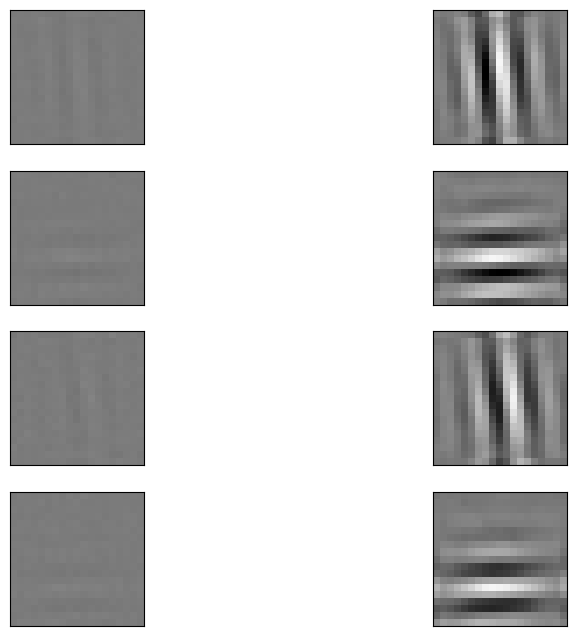

In [13]:
t,y,θ,W=R[-1]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


In [9]:
RR={}
count=0
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/52 [00:00<?, ?it/s]

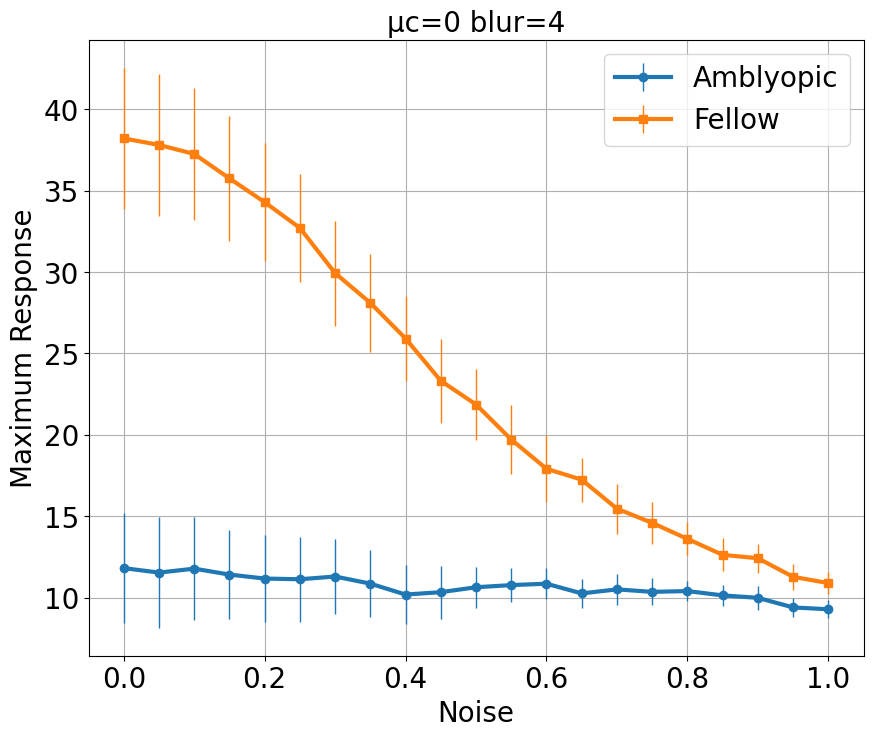

(-2.0, 12.5)

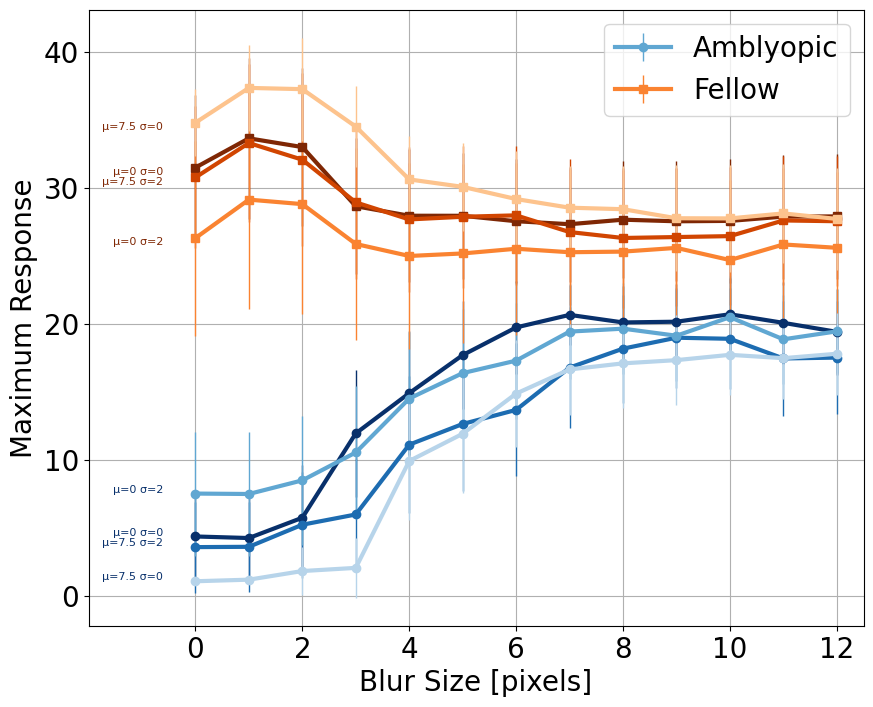

In [15]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2


    blur,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.6,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.6,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend()    
gca().set_xticks(range(0,13,2))
xlim([-2,12.5])


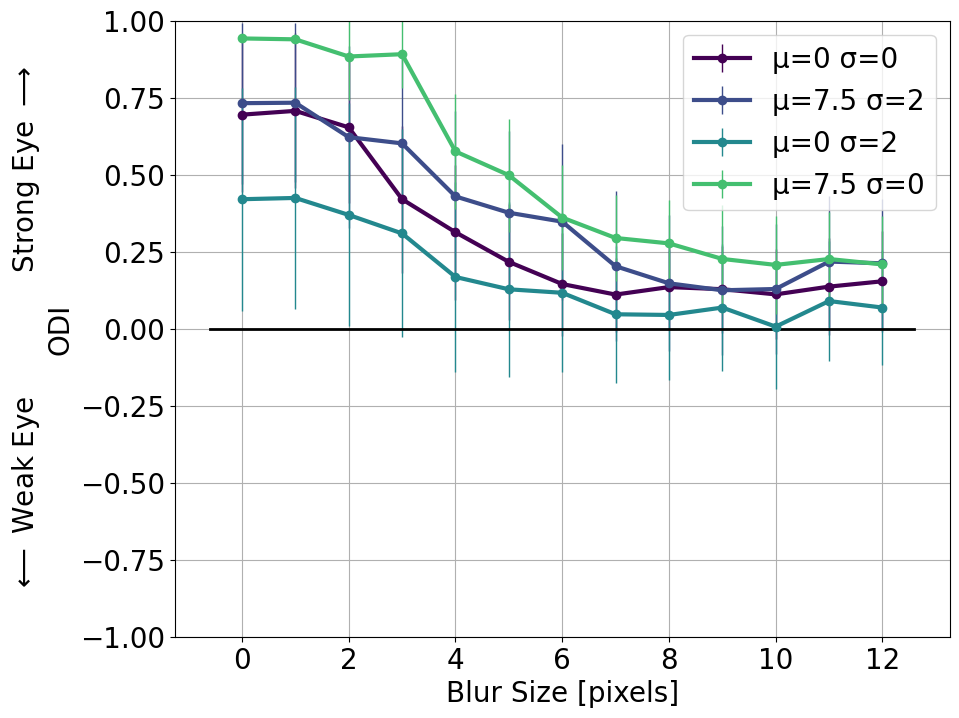

In [12]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])
        
        s+=blur,μ,σ


    blur,μ,σ=s.arrays()

    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")

legend()    
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

# gca().set_xticks(range(0,13,2))

    

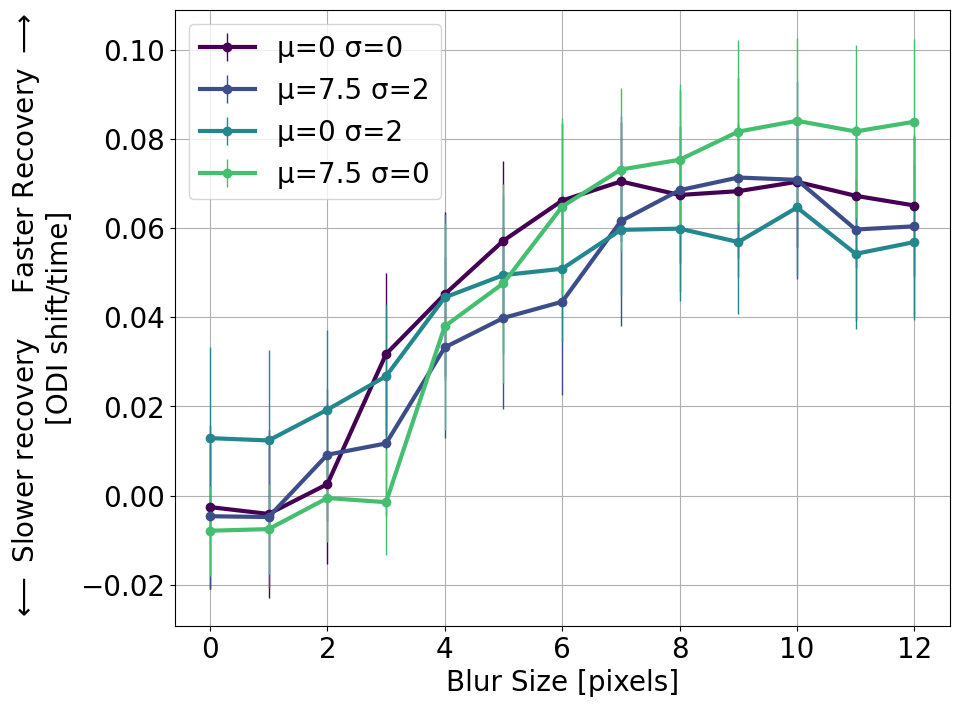

In [14]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
    
        s+=blur,recovery_rate_μ,recovery_rate_σ


    blur,μ,σ=s.arrays()

    errorbar(blur,-μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

legend()    


Manuscript/resources/fig-atropine-response-ODI-blur.png
Manuscript/resources/fig-atropine-response-ODI-blur.svg


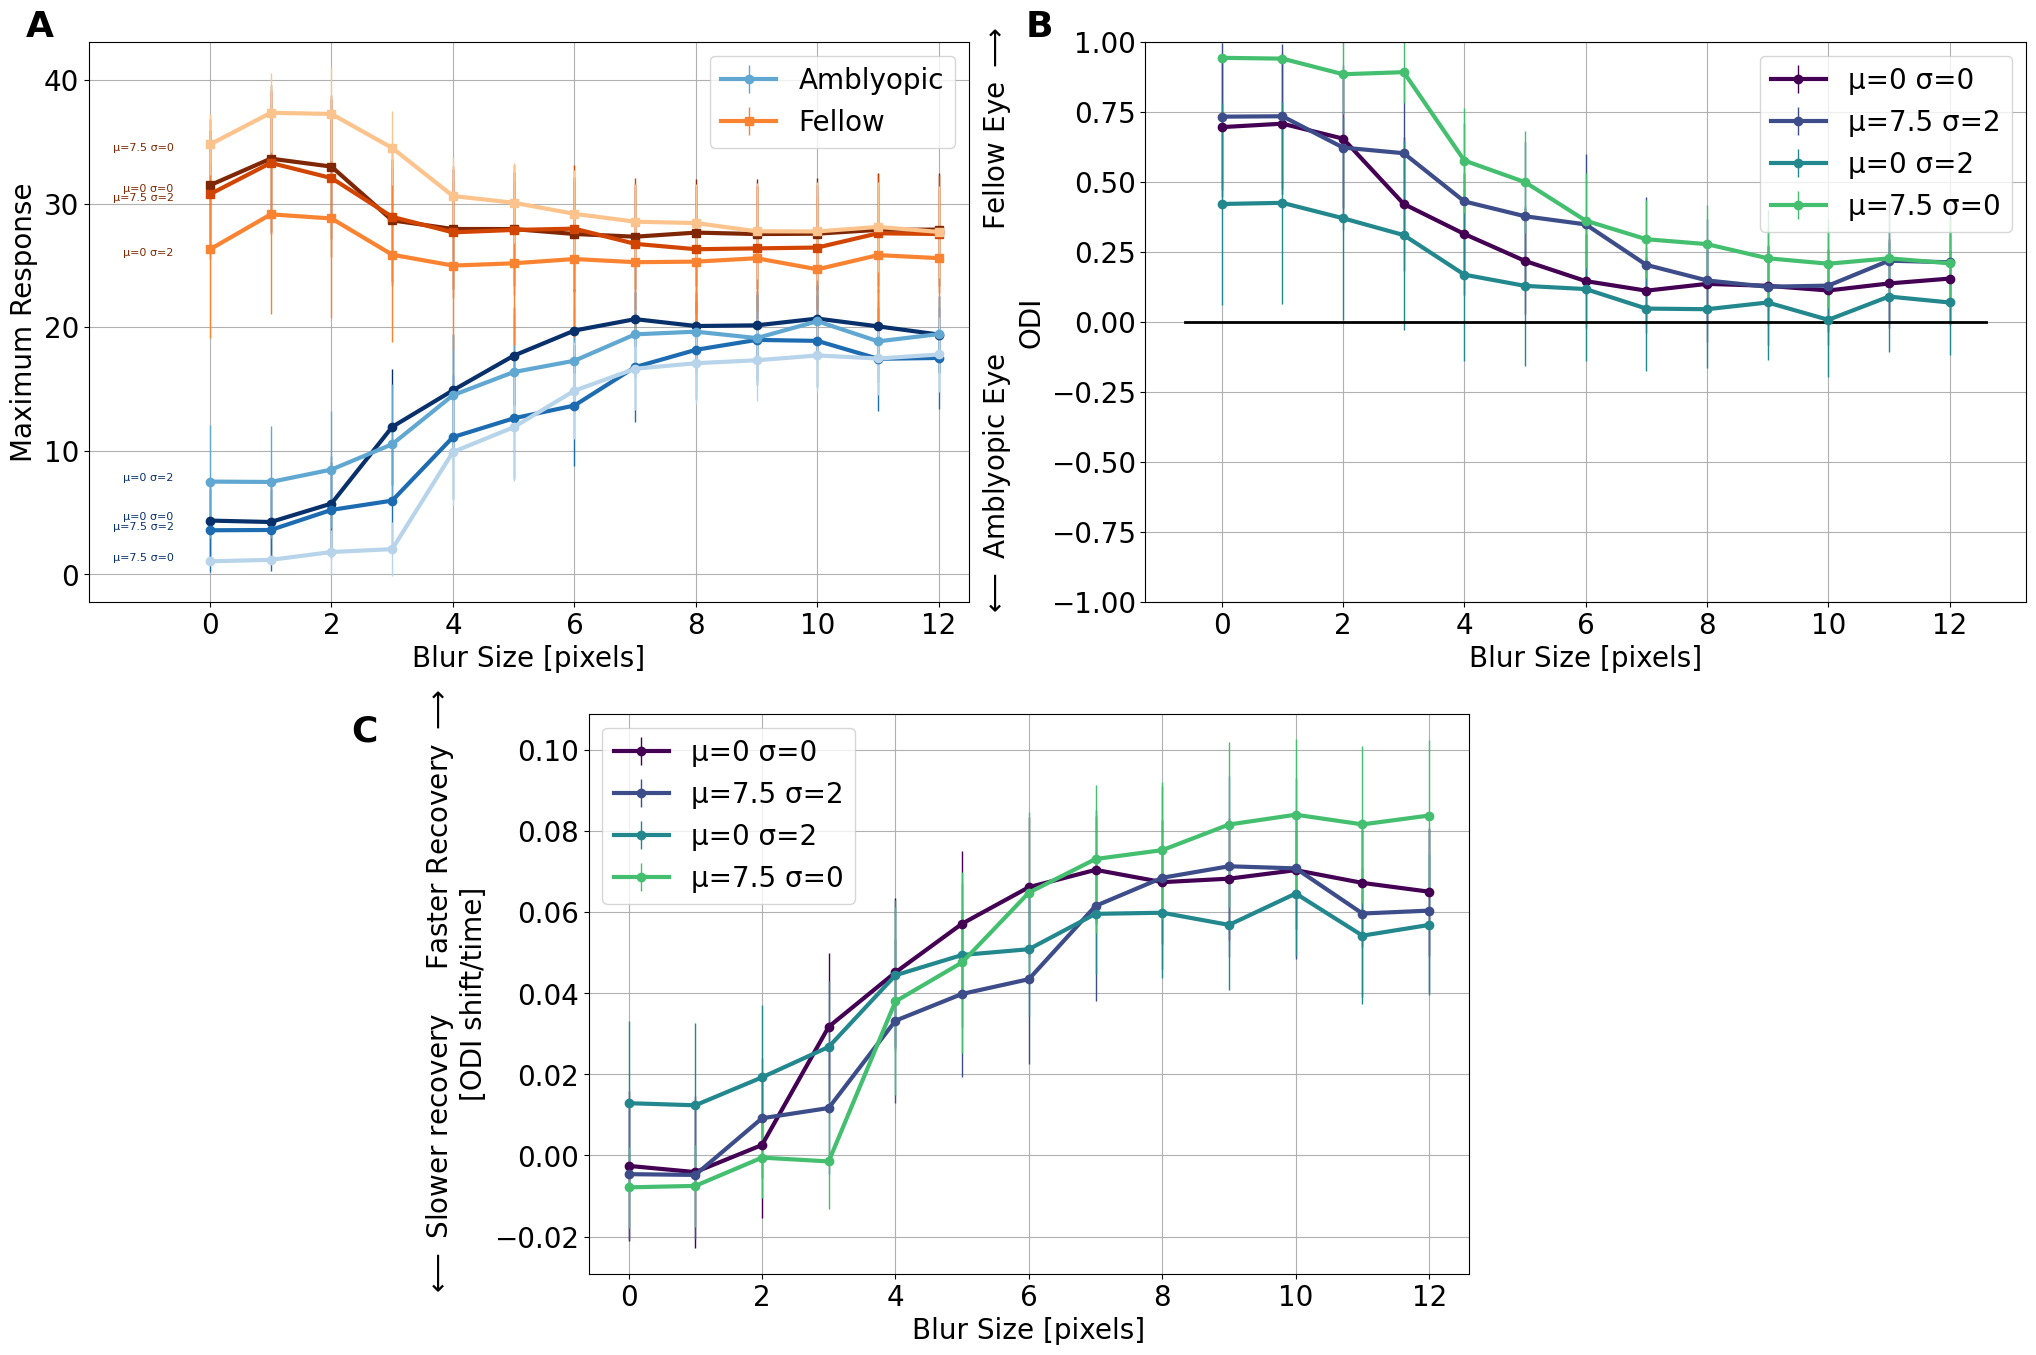

In [10]:
figure(figsize=(25,16))
subplot(2,2,1)

v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2


    blur,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.6,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.6,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend()    
gca().set_xticks(range(0,13,2))
xlim([-2,12.5])


subplot(2,2,2)

v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])
        
        s+=blur,μ,σ


    blur,μ,σ=s.arrays()

    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")

legend()    
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

# gca().set_xticks(range(0,13,2))

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])


v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
    
        s+=blur,recovery_rate_μ,recovery_rate_σ


    blur,μ,σ=s.arrays()

    errorbar(blur,-μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

legend()    


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-atropine-response-ODI-blur.png')    
        

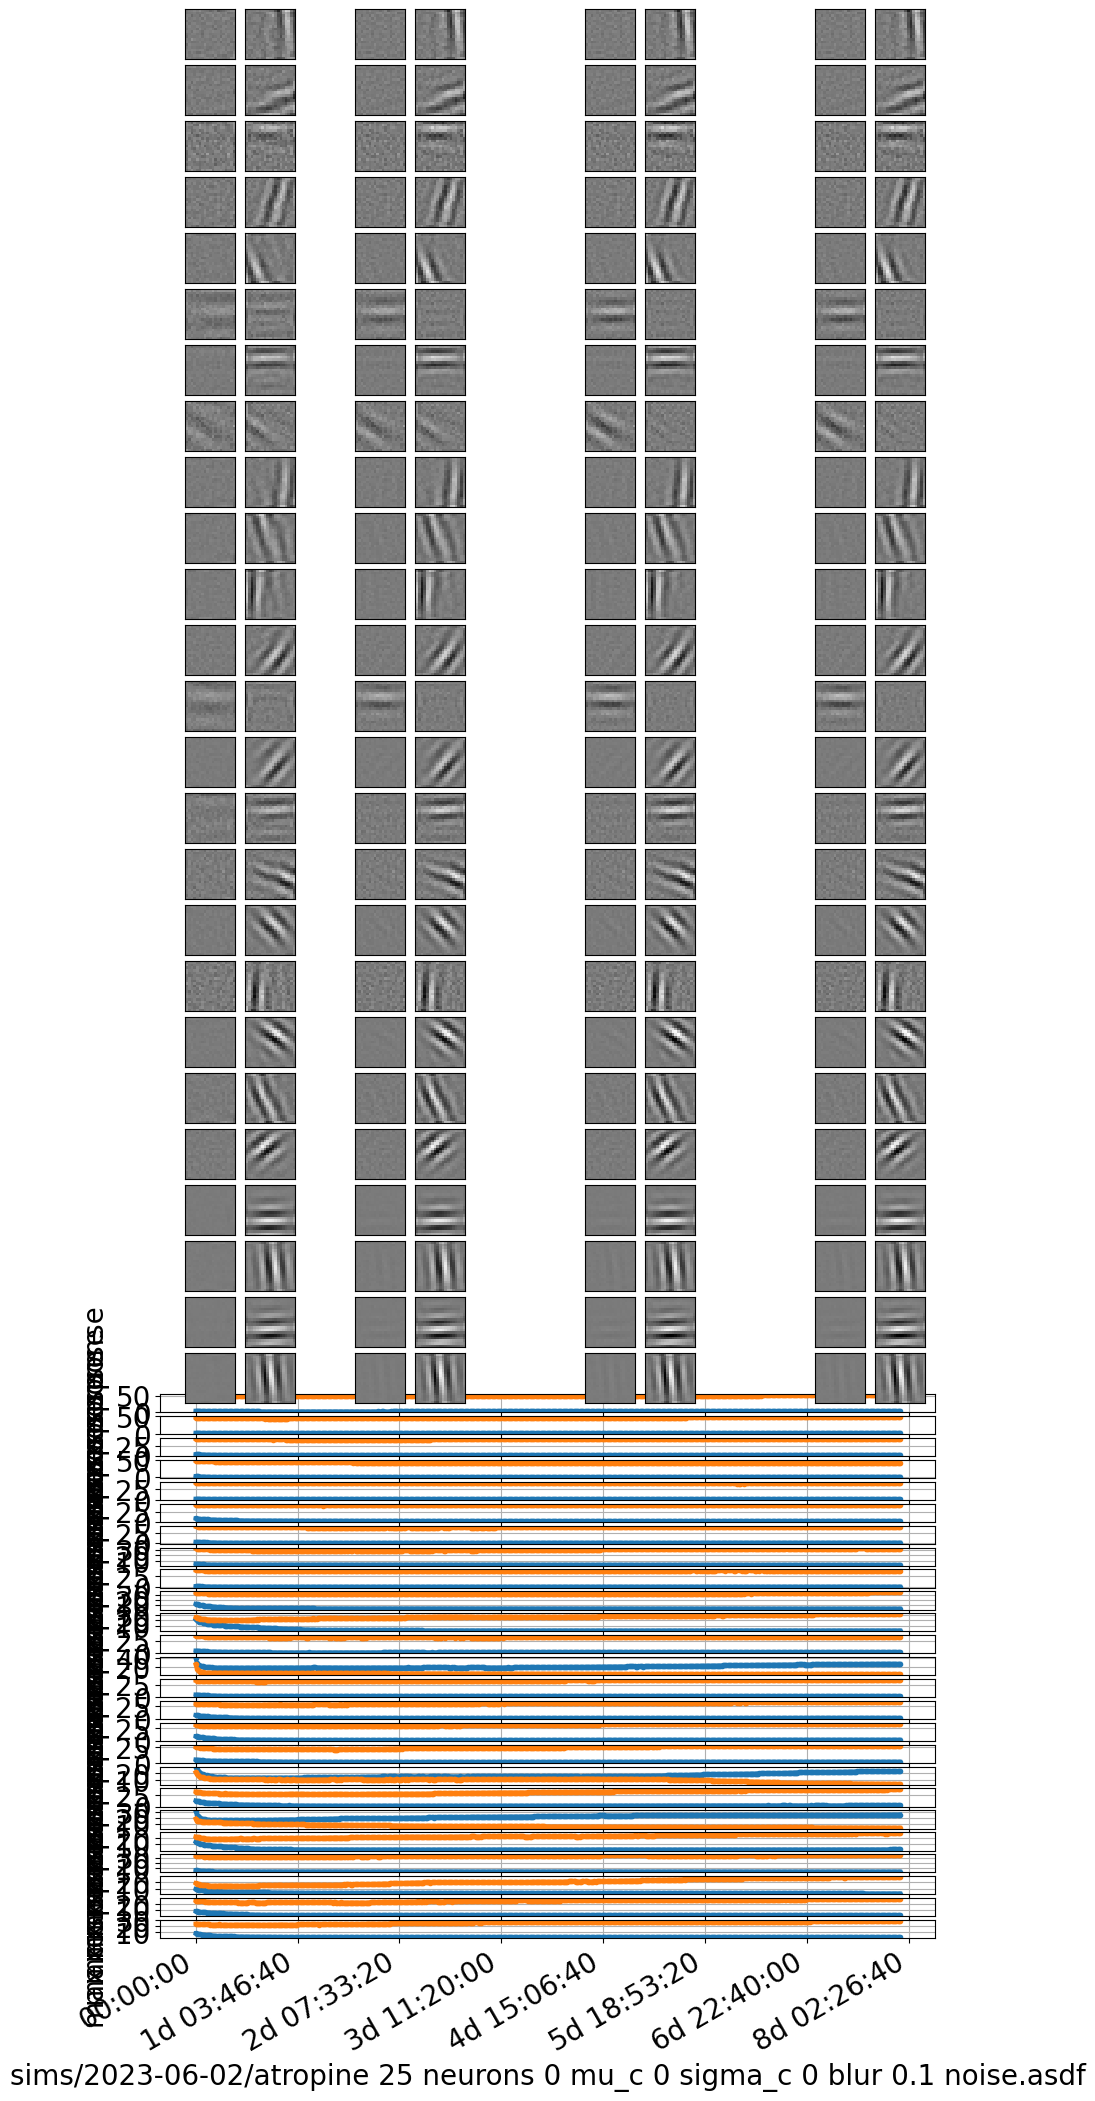

In [17]:
total_time=R.t.max()

figure()
plot_max_response(sfname)
xlabel(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )
